In [5]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import time

from scipy.spatial import ConvexHull

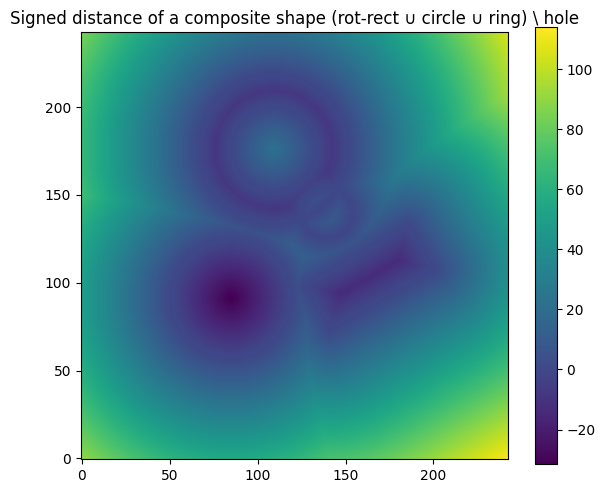

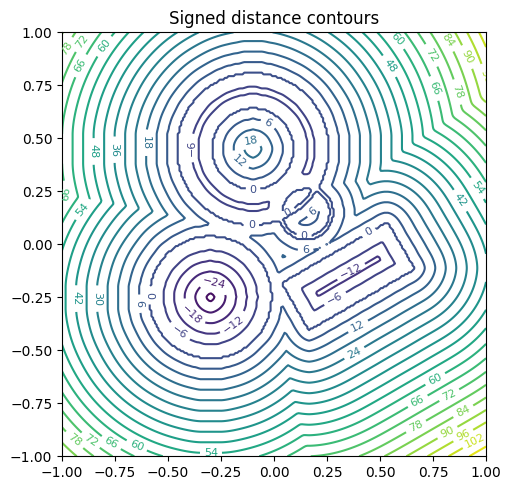

In [4]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from utils.SDF_computation import fim_eikonal_2d, build_composite_boundary_and_inside, to_signed

H, W = 243, 243  
dist0, frozen, inside = build_composite_boundary_and_inside(H, W)

dist = fim_eikonal_2d(dist0, frozen, n_iters=150)

signed = to_signed(dist, inside)

plt.figure(figsize=(6, 5))
plt.imshow(signed, origin="lower", cmap="viridis")
plt.colorbar()
plt.title("Signed distance of a composite shape (rot-rect ∪ circle ∪ ring) \\ hole")
plt.tight_layout()

ys = jnp.linspace(-1.0, 1.0, H)
xs = jnp.linspace(-1.0, 1.0, W)
X, Y = jnp.meshgrid(xs, ys)

plt.figure(figsize=(6, 5))
CS = plt.contour(X, Y, signed, levels=25)
plt.clabel(CS, inline=True, fontsize=8)
plt.gca().set_aspect("equal", adjustable="box")
plt.title("Signed distance contours")
plt.tight_layout()
plt.show()